In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
tab2a = pd.read_excel('GP_APPT_Publication_April_2021.xlsx', sheet_name= 'Table 2a', header= 12, nrows= 30,
                    usecols= ['__', 'Appointment_Date', 'Total Count of Appointments', 'Attended', 'DNA', 'Unknown'])

tab2a.rename(columns = {'__': 'Day', 'Total Count of Appointments': 'Total_Appointments', 'DNA': 'Not_Attended'}, inplace=True)

tab2a.head()

,Day,Appointment_Date,Total_Appointments,Attended,Not_Attended,Unknown
0,Thu,2021-04-01,1141269,1048705,43301,49263
1,Fri,2021-04-02,15534,9540,1194,4800
2,Sat,2021-04-03,20654,15807,2055,2792
3,Sun,2021-04-04,3418,2654,335,429
4,Mon,2021-04-05,4897,2879,381,1637


In [3]:
tab2a.tail()

,Day,Appointment_Date,Total_Appointments,Attended,Not_Attended,Unknown
25,Mon,2021-04-26,1342346,1251200,41690,49456
26,Tue,2021-04-27,1253917,1158149,46311,49457
27,Wed,2021-04-28,1171524,1082431,43232,45861
28,Thu,2021-04-29,1179655,1089749,45399,44507
29,Fri,2021-04-30,1157348,1071687,42428,43233


In [4]:
tab2a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Day                 30 non-null     object        
 1   Appointment_Date    30 non-null     datetime64[ns]
 2   Total_Appointments  30 non-null     int64         
 3   Attended            30 non-null     int64         
 4   Not_Attended        30 non-null     int64         
 5   Unknown             30 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.5+ KB


In [5]:
tab2a.describe()

,Total_Appointments,Attended,Not_Attended,Unknown
count,3.000000e+01,3.000000e+01,30.000000,30.000000
mean,7.934171e+05,7.327659e+05,29573.266667,31077.933333
std,5.558830e+05,5.174475e+05,19438.915794,19326.239419
min,3.418000e+03,2.654000e+03,335.000000,429.000000
25%,5.541650e+04,3.794675e+04,5650.750000,9821.000000
50%,1.135372e+06,1.047134e+06,41861.000000,42172.000000
75%,1.173124e+06,1.086140e+06,43339.250000,44663.000000
max,1.342346e+06,1.251200e+06,46311.000000,49457.000000


In [6]:
t2am = tab2a.mean()
t2am.name= ' '

<ipython-input-6-a26b9304306c>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  t2am = tab2a.mean()


Text(0.5, 1.0, 'Average Appointment Attendance April 2021')

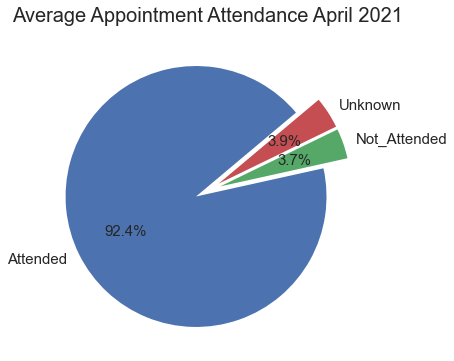

In [7]:
t2am[1:4].plot.pie(figsize= [10,6], fontsize= 15, explode= [0.1]*3, autopct= '%1.1f%%', startangle= 40).set_title('Average Appointment Attendance April 2021', fontsize= 20)

In [8]:
t2sum = tab2a.sum()[1:]
print('There were {} appointments booked in April 2021, of which, {} were attended, {} were not attended and {} are unknown'.format(*t2sum))

There were 23802512 appointments booked in April 2021, of which, 21982976 were attended, 887198 were not attended and 932338 are unknown


Text(0, 0.5, 'Millions of Appointments')

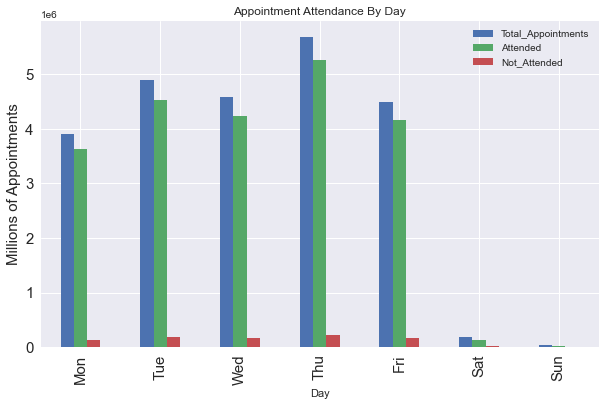

In [9]:
tab2a.groupby(['Day'])[['Total_Appointments', 'Attended', 'Not_Attended']].sum().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat' ,'Sun']).plot.bar(figsize= (10,6), fontsize = 15, title= 'Appointment Attendance By Day').set_ylabel('Millions of Appointments', fontsize= 15)